<h1>Project : Test a Perceptual Phenomenon

<h3>Name: ELDHOSE PETER

<h3>Data Set : Stroopdata.csv

<h3>Link to data set :<h3>https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view

<h3>Introduction

<b>In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Reference : https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

In [32]:
#Load the libraries
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import scipy
from scipy.stats import ttest_rel as ttest
import numpy as np
%matplotlib inline



In [33]:
df=pd.read_csv('stroopdata.csv')
data=df

In [34]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


<h3>Lets see the distribution of time taken in congruent test and incongruent test.

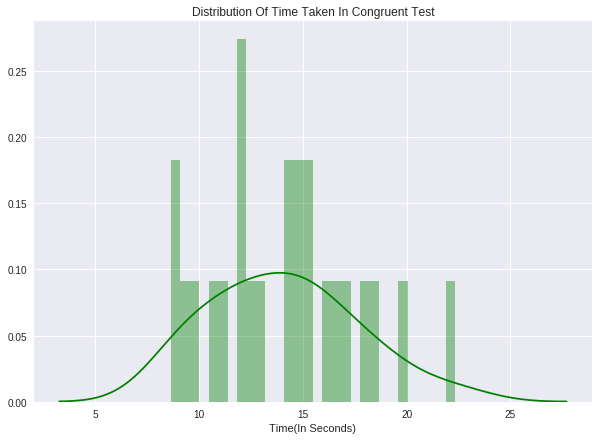

In [35]:
plt.figure(figsize=(10,7))
plt.title('Distribution Of Time Taken In Congruent Test')

sns.distplot(df['Congruent'],bins=30,color='Green')
plt.xlabel('Time(In Seconds)')


<b>Most people took 8 to 15 seconds to complete congruent test 

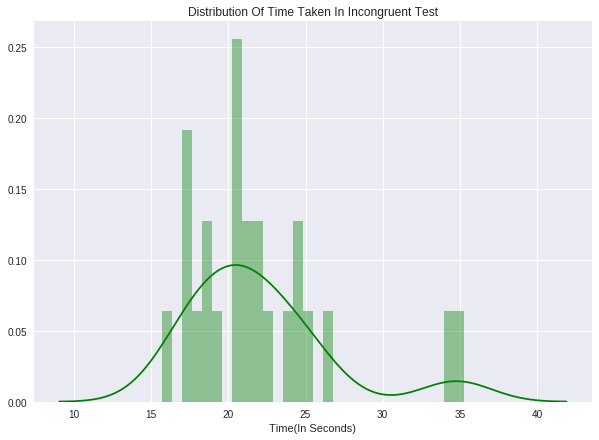

In [36]:
plt.figure(figsize=(10,7))
plt.title('Distribution Of Time Taken In Incongruent Test')
sns.distplot(df['Incongruent'],bins=30,color='Green')
plt.xlabel('Time(In Seconds)')


<b>Most people took 16 to 22 seconds to complete incongruent test.

<h3>Congruent vs Incongruent

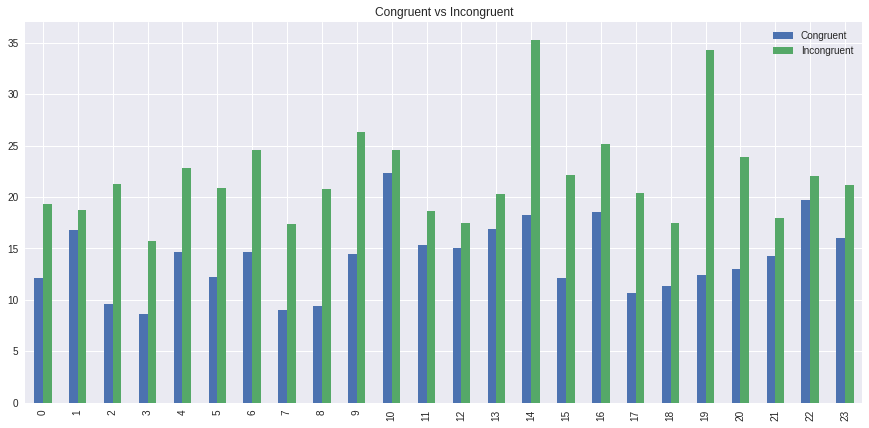

In [86]:
data.plot(kind='bar',figsize=(15,7),title='Congruent vs Incongruent')

<b>The congruent test results vary from 8 to 23 seconds while the incongruent test results vary from 15 to 36 seconds.

<h3>What are dependent and independent variables in experiment?

<b>Independent variables : Words in congruent and incongruent tests.<br>
Dependent variable : Time taken to read the words in congruent and incongruent tests.

<h3>Appropriate set of hypotheses 

<b>The congruent test and incongruent test is performed on same set of people.So congruent test is independent.
But I doubt  whether incongruent test is biased due to other factors.Its an example of dependent sample.
A one tailed dependent sample t test is sufficient as the sample size is small hence z score is not useful.I firstly thought of using anova for this purpose. But as anova have some assumptions ,I couldn't use it. So I decided to use t test .  The degrees of freedom is sample size reduced by 1 , so we get 23.<br>




<b>Null hypotheses:<br>
H<sub>0</sub> : $u$<sub>$C$</sub>$=$u<sub>Ic</sub><br>
Alternative hypotheses:<br>
H<sub>A</sub> : $u$<sub>$C$</sub>$<$u<sub>Ic</sub><br>
Where $u$<sub>$Ic$</sub> is the incongruent test population mean and  $u$<sub>$C$</sub> is the congruent test population mean.The null hypotheses states that both the congruent population mean and  incongruent test population mean are equal.
The alternative hypotheses is that congruent test population mean is less than the incongruent test population mean.<br>


In [26]:
df["difference"]=df["Congruent"]-df["Incongruent"]
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


<h3>Descriptive statistics

In [27]:
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


<h3>Lets find the t static using scipy module.

In [34]:
ttest(df['Congruent'],df["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

<b>*The probabiliy we got using scipy function is for two tailed experiment.So for one tail experiment we divide
the probability by two. 

<b>
Test Type : single tailed dependent sample t test<br>
alpha=0.01<br>
t critical for one tailed test in negative direction: -2.500<br> 
t static =-8.02<br>
The t value is within the critical region.<br>
One tailed probability : 2.05150025e-8 << 0.01  <br>
The t value is significant at 0.01 alpha level .Hence we reject the null hypotheses.<br>
This provides enough evidence to support the claim that it takes less time to complete congruent test than the incongruent test.

<h3>My Thoughts

<b>The data set contains test which was performed over same set of people. The test would be better if diferent groups of people was subjected to different tests.I doubt whether the incongruent test was affected by any other factors.
Numerical stroop effect is similar to stroop effect.In Psychology, the numerical Stroop effect (related to the standard Stroop effect) demonstrates the relationship between numerical values and physical sizes. When digits are presented visually, they can be physically large or small, irrespective of their actual values. Congruent pairs occur when size and value correspond (e.g., large 5 small 3) while incongruent pairs occur when size and value are incompatible (e.g., large 3 small 5). It was found that when people are asked to compare digits, their reaction time tends to be slower in the case of incongruent pairs. This reaction time difference between congruent and incongruent pairs is termed the numerical Stroop effect (or the size incongruity effect; SICE)<br>
Reference : https://en.wikipedia.org/wiki/Numerical_Stroop_effect